# Setup

## Load data and imports

In [1]:
%run data_preprocessing.ipynb

In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Get test and train data

In [3]:
# for get_data
enable_feature_engineering = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = True
split_size = (0.9, 0.0, 0.1)

In [4]:
y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

# Model

## Create and train the model

In [5]:
#read in data
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [6]:
model = XGBClassifier()
model.fit(x_train, y_train)

print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


# Evaluation

## Prediction

In [16]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [17]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.08%


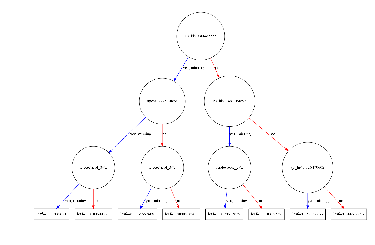

In [18]:
from graphviz import Digraph
xgb.plot_tree(model, num_trees=0)
plt.show()

## Most important variables

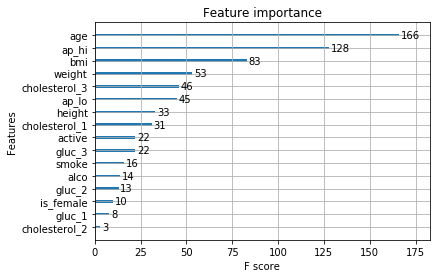

In [19]:
xgb.plot_importance(model)
